In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ds_salaries.csv')

In [4]:
del df['Unnamed: 0']

Важно! В данных небольшая выборка. Она не отражает реальность IT сферы. Поэтому нельзя использовать этот Dataset для вывода статистических данных по отрасли. НО! Он идеально подходит новичкам для тренировок, так как содержит множество показателей и зависимостей, которые можно вывести.

In [6]:
df.shape

(607, 11)

In [14]:
df = df.rename(columns={'job_title': 'job'})

Оставляю только 4 профессии, так как в других недостаточно большая выборка

In [15]:
list_ds = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']
df = df.query('job in @list_ds')

Сделаю подсчет разных значений по колонкам, чтобы понимать, каких данных больше и их в дальнейшем использовать

In [16]:
df.job.value_counts()

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Name: job, dtype: int64

In [58]:
df.experience_level.value_counts()

SE    198
MI    154
EN     55
EX      6
Name: experience_level, dtype: int64

In [63]:
df.company_location.value_counts().head(4)

US    256
GB     39
DE     16
IN     14
Name: company_location, dtype: int64

Посмотрим в какой стране наиболее высокие зарплаты средние зарплаты в Data Science у Middle специалистов

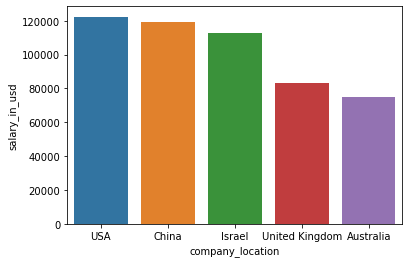

In [24]:
ds_salaries = df.query('job== "Data Scientist" & employment_type == "FT" & experience_level == "MI"') \
  .groupby(['job', 'company_location'], as_index=False) \
  .agg({'salary_in_usd': 'mean'}) \
  .sort_values('salary_in_usd', ascending=False).head()

g = sns.barplot(data=ds_salaries, x='company_location', y = 'salary_in_usd')
g.set(xticklabels=["USA", "China", "Israel", 'United Kingdom', 'Australia']);

Проверим, если ли какая-то корреляция/зависимость между страной происхождения человека и его зарплатой

In [51]:
df_middles_ds = df.query('experience_level == "MI" & job == "Data Scientist" & company_location == "US"')

<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

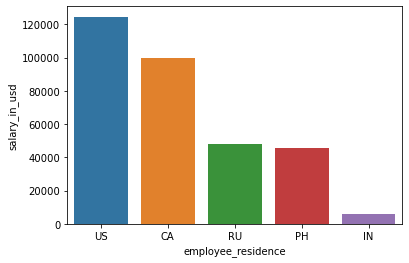

In [52]:
salary_of_emp_countries = df_middles_ds \
    .groupby('employee_residence', as_index=False) \
    .agg({'salary_in_usd': 'mean'}) \
    .sort_values('salary_in_usd', ascending=False)

sns.barplot(data=salary_of_emp_countries, x='employee_residence', y='salary_in_usd')
